In [4]:
from code.NMR_predict import GPR_NMR

In [5]:
# Define path to xyz files and path to SOAP files
#XYZ_directory =  ['/home/alex/Pt_NMR/data/structures/']
#SOAP_directory = ['/home/alex/Pt_NMR/data/representations/SOAP/']

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/', '/home/alex/Pt_NMR/data/structures/test_split/']

SOAP_directory = ['/home/alex/Pt_NMR/data/representations/SOAP/train/',
                  '/home/alex/Pt_NMR/data/representations/SOAP/test/']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [2.0, 3, 7]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='SOAP',
                 descriptor_params=params, central_atom='Pt', mode ='read', xyz_path=XYZ_directory, xyz_base='st_')


In [6]:
# Define path and column name of the csv where labels (targets) are stored
target_name = 'Experimental'
target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv', '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

#target_path = ['/home/alex/Pt_NMR/data/labels/final_data_corrected.csv']

# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_predict(kernel_degree=2,
                            target_path=target_path, target_name=target_name,
                            normalize=True, noise=1e-3,
                            parity_plot=False, lc=False, partitioned=False)

print(errors_std)

Descriptor files read: 237 
Average size: 83.0 kB 

Dimensions of design matrix: (237, 10608)
Descriptor files read: 60 
Average size: 73.625 kB 

Dimensions of design matrix: (60, 9408)
RMSE (4-fold CV): 216.55398631343468 [ppm] 53.38154999744802 [ppm] (STDEV)
MAE (4-fold CV): 134.8738276828151 [ppm] 24.516576621634677 [ppm] (STDEV)
(134.8738276828151, 24.516576621634677, 216.55398631343468, 53.38154999744802)


In [4]:

XYZ_directory = '/home/alex/Pt_NMR/data/structures/'
SOAP_directory = '/home/alex/Pt_NMR/data/representations/APE_RF/'

# Define list of SOAP params [r_cut, n_max, l_max]
params = [3.0, 1000]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='APE-RF',
                 descriptor_params=params, central_atom='Pt', mode ='write', xyz_path=XYZ_directory, xyz_base='st_')

RMSE (4-fold CV): 207.41602852454292 [ppm] 13.077343231011563 [ppm] (STDEV)
MAE (4-fold CV): 147.5007397240991 [ppm] 8.124650178814962 [ppm] (STDEV)


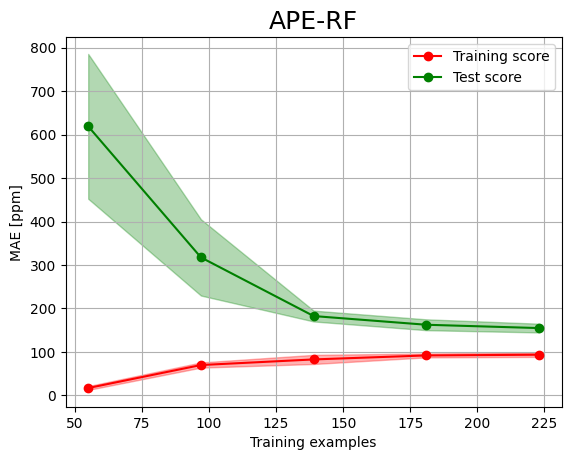

Outliers (16):
------------
Compound Name: trans-[Pt(SMe2)I2], Observed: -5789, Predicted: -4992.75, Residual: -796.25
Compound Name: cis-[Pt(PMe3)I2], Observed: -4588, Predicted: -5550.875, Residual: 962.875
Compound Name: trans-Pt(SCN)2(SbMe3)2, Observed: -4570, Predicted: -5276.25, Residual: 706.25
Compound Name: trans-[Pt(AsMe3)I2], Observed: -5518, Predicted: -5060.5, Residual: -457.5
Compound Name: [Pt(NMe3)Cl3]-, Observed: -1715, Predicted: -2021.6875, Residual: 306.6875
Compound Name: trans-PtCl(SnCl3)(PEt3)2, Observed: -4780, Predicted: -4998.375, Residual: 218.375
Compound Name: cis-Pt(NCS)2(PMe3)2, Observed: -4372, Predicted: -4057.5, Residual: -314.5
Compound Name: trans-[Pt(AsMe3)Br2], Observed: -4378, Predicted: -4094.25, Residual: -283.75
Compound Name: [Pt(SCN)3(SbMe3)]-, Observed: -4374, Predicted: -4063.375, Residual: -310.625
Compound Name: cis-[PtMe2(PMe2Ph)2], Observed: -4594, Predicted: -4283.9375, Residual: -310.0625
Compound Name: cis-Pt(Me4en)2(Ox), Observed: -

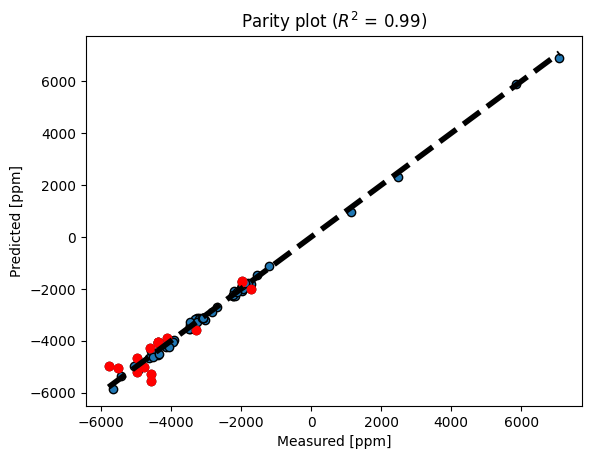

(147.5007397240991, 8.124650178814962, 207.41602852454292, 13.077343231011563)


In [6]:
# Define path and column name of the csv where labels (targets) are stored

target_name = 'Experimental'
target_path = '/home/alex/Pt_NMR/data/labels/final_data_corrected'

# Use predict function for regression and obtaining CV prediction errors

errors_std = pt_gpr.GPR_predict(kernel_degree=2,
                            target_path=target_path, target_name=target_name,
                            normalize=False, noise=10.0, parity_plot=True, lc=True)

print(errors_std)

In [4]:
#XYZ_directory = ['/home/alex/Pt_NMR/data/structures/']
#SIF_directory = ['/home/alex/Pt_NMR/data/representations/SIF/']

XYZ_directory = ['/home/alex/Pt_NMR/data/stratified_train_structures/', '/home/alex/Pt_NMR/data/stratified_test_structures/']

SIF_directory = ['/home/alex/Pt_NMR/data/representations/SIF/train/',
                  '/home/alex/Pt_NMR/data/representations/SIF/test/']

# Define list of SOAP params [r_cut, n_max, l_max]
params = ['EN', 'alpha', 'val', 'qmol']

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SIF_directory, descriptor_type='SIF',
                 descriptor_params=params, central_atom='Pt', mode ='write', xyz_path=XYZ_directory, xyz_base='st_')

RMSE (4-fold CV): 1252.9564791995626 [ppm] 298.1840193625763 [ppm] (STDEV)
MAE (4-fold CV): 820.9773405859047 [ppm] 144.79917697842473 [ppm] (STDEV)


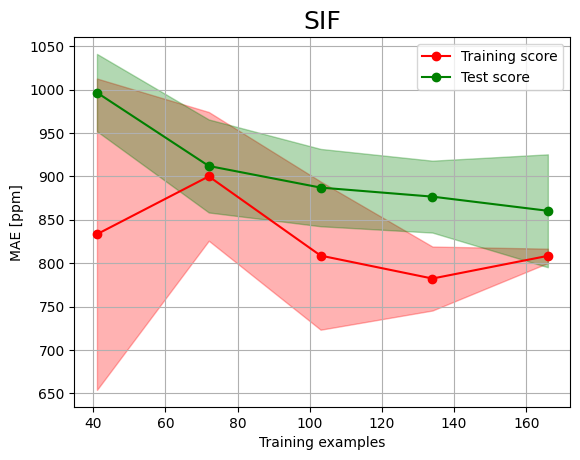

(820.9773405859047, 144.79917697842473, 1252.9564791995626, 298.1840193625763)


In [6]:
# Define path and column name of the csv where labels (targets) are stored

target_name = 'Experimental'
#target_path = ['/home/alex/Pt_NMR/data/labels/final_data_corrected.csv']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/stratified_indexed_train_shifts.csv', '/home/alex/Pt_NMR/data/labels/train_test_split/stratified_indexed_test_shifts.csv']

# Use predict function for regression and obtaining CV prediction errors

errors_std = pt_gpr.GPR_predict(kernel_degree=2,
                            target_path=target_path, target_name=target_name,
                            normalize=False, noise=0.01, lc=True, partitioned=False)

print(errors_std)

